In [5]:
import requests # type: ignore
import xml.etree.ElementTree as ET

# 한국은행 Open API 설정
BASE_URL = 'https://ecos.bok.or.kr/api'
SERVICE_NAME = 'StatisticSearch'  # 서비스명
API_KEY = 'FNJ2W8O88I2TSGD3GOMD'  # 발급받은 API 키를 입력
REQUEST_TYPE = 'xml'  # 결과값의 파일 형식 - xml, json
LANGUAGE = 'kr'  # 결과값의 언어 - kr(국문), en(영문)
START_COUNT = '1'  # 전체 결과값 중 시작 번호
END_COUNT = '100000'  # 전체 결과값 중 끝 번호
STAT_CODE = '101Y004'  # 통계표코드 (선택사항)
FREQUENCY = "M"  # 주기 (년: A, 반년: S, 분기: Q, 월: M, 반월: SM, 일: D)
START_DATE = "195001"  # 검색 시작일자
END_DATE = "202412"  # 검색 종료일자

# 선택 항목들 (필요시 설정)
STAT_ITEM_CODE1 = "BBHA00"  # 통계항목 코드 1
STAT_ITEM_CODE2 = "?"  # 통계항목 코드 2 (선택)
STAT_ITEM_CODE3 = "?"  # 통계항목 코드 3 (선택)
STAT_ITEM_CODE4 = "?"  # 통계항목 코드 4 (선택)

# API 호출 URL 생성
url = f'https://ecos.bok.or.kr/api/StatisticSearch/{API_KEY}/xml/kr/1/{END_COUNT}/{STAT_CODE}/{FREQUENCY}/{START_DATE}/{END_DATE}/{STAT_ITEM_CODE1}/{STAT_ITEM_CODE2}/{STAT_ITEM_CODE3}/{STAT_ITEM_CODE4}'
#url = 'https://ecos.bok.or.kr/api/StatisticSearch/sample/xml/kr/1/10/200Y001/A/2015/2021/10101/?/?/?'
# API 요청
response = requests.get(url)

# 응답 확인 및 XML 파싱
if response.status_code == 200:
    try:
        root = ET.fromstring(response.content)
        # print(root)
        xml_root = ET.tostring(root, encoding='utf-8').decode('utf-8')
        print(xml_root)  # 예쁘게 출력
    except ET.ParseError:
        print("XML parse error. Response content is not in XML format.")
        print(response.text)
else:
    print(f"Error: {response.status_code}, Message: {response.text}")


<StatisticSearch>
  <list_total_count number="true">463</list_total_count>
  <row>
    <STAT_CODE>101Y004</STAT_CODE>
    <STAT_NAME>1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)</STAT_NAME>
    <ITEM_CODE1>BBHA00</ITEM_CODE1>
    <ITEM_NAME1>M2(평잔, 원계열)</ITEM_NAME1>
    <ITEM_CODE2 />
    <ITEM_NAME2 />
    <ITEM_CODE3 />
    <ITEM_NAME3 />
    <ITEM_CODE4 />
    <ITEM_NAME4 />
    <UNIT_NAME>십억원 </UNIT_NAME>
    <WGT />
    <TIME>198601</TIME>
    <DATA_VALUE>43133.6</DATA_VALUE>
  </row>
  <row>
    <STAT_CODE>101Y004</STAT_CODE>
    <STAT_NAME>1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)</STAT_NAME>
    <ITEM_CODE1>BBHA00</ITEM_CODE1>
    <ITEM_NAME1>M2(평잔, 원계열)</ITEM_NAME1>
    <ITEM_CODE2 />
    <ITEM_NAME2 />
    <ITEM_CODE3 />
    <ITEM_NAME3 />
    <ITEM_CODE4 />
    <ITEM_NAME4 />
    <UNIT_NAME>십억원 </UNIT_NAME>
    <WGT />
    <TIME>198602</TIME>
    <DATA_VALUE>43492.4</DATA_VALUE>
  </row>
  <row>
    <STAT_CODE>101Y004</STAT_CODE>
    <STAT_NAME>1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)</STAT_NAME>
    <ITEM

In [6]:
import requests # type: ignore
import xml.etree.ElementTree as ET
import pandas as pd  # type: ignore # pandas import 추가

# ... existing code ...

# 응답 확인 및 XML 파싱
if response.status_code == 200:
    try:
        root = ET.fromstring(response.content)
        # XML 데이터를 DataFrame으로 변환
        data = []
        for item in root.findall('.//row'):  # XML 구조에 따라 경로 수정
            row_data = {child.tag: child.text for child in item}
            for child in item:
                row_data[child.tag] = child.text
            data.append(row_data)
        
        df = pd.DataFrame(data)
        print(df)  # DataFrame 출력
    except ET.ParseError:
        print("XML parse error. Response content is not in XML format.")
        print(response.text)
else:
    print(f"Error: {response.status_code}, Message: {response.text}")

    STAT_CODE                        STAT_NAME ITEM_CODE1   ITEM_NAME1  \
0     101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
1     101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
2     101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
3     101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
4     101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
..        ...                              ...        ...          ...   
458   101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
459   101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
460   101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
461   101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   
462   101Y004  1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)     BBHA00  M2(평잔, 원계열)   

    ITEM_CODE2 ITEM_NAME2 ITEM_CODE3 ITEM_NAME3 ITEM_CODE4 ITEM_NAME4  \
0         None       None       None  

In [7]:
df.tail()

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,WGT,TIME,DATA_VALUE
458,101Y004,"1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)",BBHA00,"M2(평잔, 원계열)",None,None,None,None,None,None,십억원,None,202403,4000898.1
459,101Y004,"1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)",BBHA00,"M2(평잔, 원계열)",None,None,None,None,None,None,십억원,None,202404,4011114.1
460,101Y004,"1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)",BBHA00,"M2(평잔, 원계열)",None,None,None,None,None,None,십억원,None,202405,4008655.8
461,101Y004,"1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)",BBHA00,"M2(평잔, 원계열)",None,None,None,None,None,None,십억원,None,202406,4034006.7
462,101Y004,"1.1.3.1.2. M2 상품별 구성내역(평잔, 원계열)",BBHA00,"M2(평잔, 원계열)",None,None,None,None,None,None,십억원,None,202407,4057904.9


In [ ]:
#!pip install matplotlib
#!pip install scipy
#!pip install seaborn

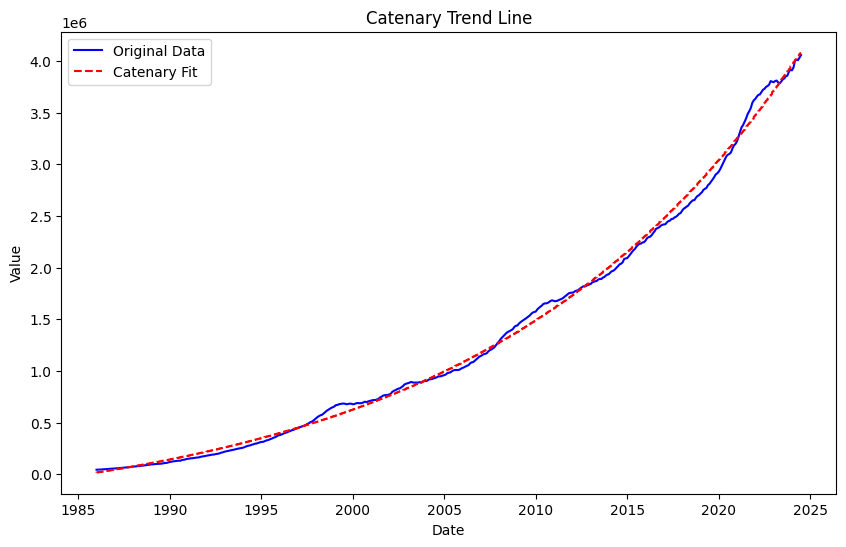

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 현수선 함수 정의
def catenary(x, a, b, c):
    return a * np.cosh((x - b) / a) + c

# 데이터 준비
# df는 이미 로드된 DataFrame이라고 가정
# 'DATE'와 'VALUE'는 시계열 데이터의 날짜와 값 컬럼명이라고 가정
df['DATE'] = pd.to_datetime(df['TIME'], format='%Y%m')
df = df.sort_values('DATE')
x_data = np.arange(len(df))
y_data = df['DATA_VALUE'].astype(float).values

# 초기 추정값 설정 (a, b, c)
initial_guess = (1, len(df) / 2, np.mean(y_data))

# 곡선 피팅
popt, pcov = curve_fit(catenary, x_data, y_data, p0=initial_guess, maxfev=10000)

# 피팅된 곡선 값 계산
x_fit = np.linspace(0, len(df) - 1, 1000)
y_fit = catenary(x_fit, *popt)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], y_data, 'b-', label='Original Data')
plt.plot(df['DATE'].iloc[x_fit.astype(int)], y_fit, 'r--', label='Catenary Fit')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Catenary Trend Line')
plt.show()

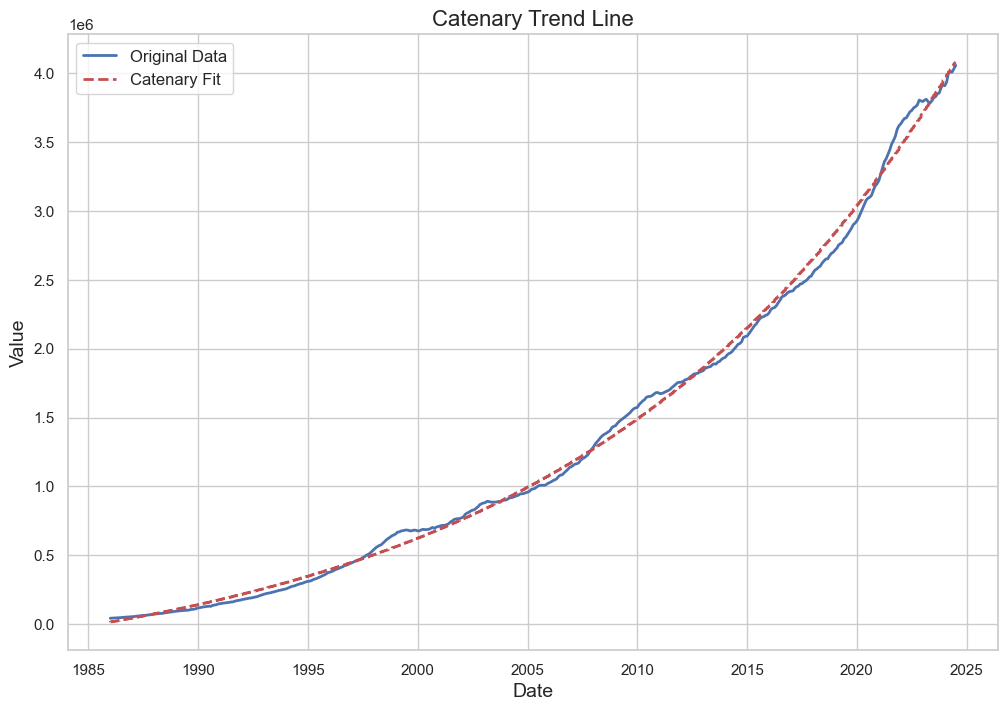

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 현수선 함수 정의
def catenary(x, a, b, c):
    return a * np.cosh((x - b) / a) + c

# 데이터 준비
# df는 이미 로드된 DataFrame이라고 가정
# 'DATE'와 'VALUE'는 시계열 데이터의 날짜와 값 컬럼명이라고 가정
df['DATE'] = pd.to_datetime(df['TIME'], format='%Y%m')
df = df.sort_values('DATE')
x_data = np.arange(len(df))
y_data = df['DATA_VALUE'].astype(float).values

# 초기 추정값 설정 (a, b, c)
initial_guess = (1, len(df) / 2, np.mean(y_data))

# 곡선 피팅
popt, pcov = curve_fit(catenary, x_data, y_data, p0=initial_guess, maxfev=10000)

# 피팅된 곡선 값 계산
x_fit = np.linspace(0, len(df) - 1, 1000)
y_fit = catenary(x_fit, *popt)

# 결과 시각화
plt.figure(figsize=(12, 8))
plt.plot(df['DATE'], y_data, 'b-', label='Original Data', linewidth=2)
plt.plot(df['DATE'].iloc[x_fit.astype(int)], y_fit, 'r--', label='Catenary Fit', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.title('Catenary Trend Line', fontsize=16)
plt.grid(True)
plt.show()

In [20]:
a = popt[0].item()
b = popt[1].item()
c = popt[2].item()

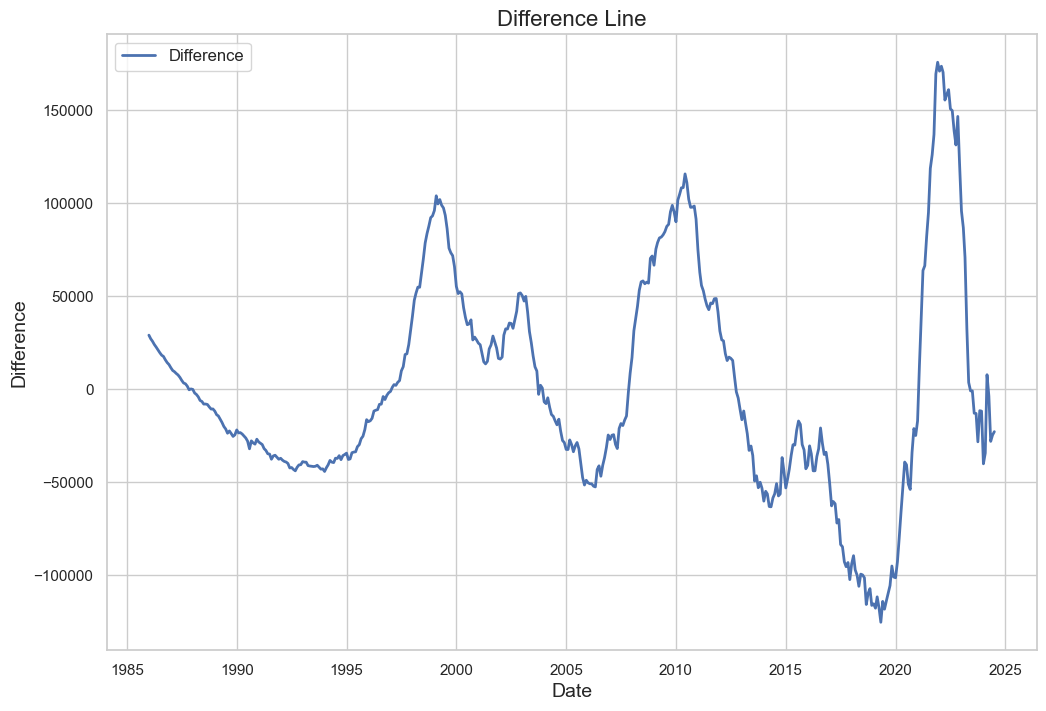

In [24]:

df['APROX'] = catenary(x_data, *popt).astype(float)

df['DIFF'] = df['DATA_VALUE'].astype(float) - df['APROX']
y_data = df['DIFF'].astype(float).values

# 결과 시각화
plt.figure(figsize=(12, 8))
plt.plot(df['DATE'], y_data, 'b-', label='Difference', linewidth=2)
#plt.plot(df['DATE'].iloc[x_fit.astype(int)], y_fit, 'r--', label='Catenary Fit', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.legend(fontsize=12)
plt.title('Difference Line', fontsize=16)
plt.grid(True)
plt.show()